# Introdução

## Equipa
<ul>
    <li>Gonçalo Oliveira - 18559
    <li>André Reis - 26012
    <li>Diogo Gonçalves - 26021
</ul>

## Contexto do Projeto
O projeto tem como objetivo explorar e compreender os fatores que influenciam o ambiente urbano e o mercado imobiliário de Boston, utilizando dados quantitativos sobre características da região.

## Objetivos
<ol>
    <li> Classificação Supervisionada
    <ul>
        <li> Objetivo: Prever a proximidade ao Rio Charles (chas) usando as variáveis disponíveis.
        <li> Explicação: Determinar quais fatores (como criminalidade, poluição ou acessibilidade) são mais indicativos da proximidade ao Rio.
    </ul>
    <li> Agrupamento com K-Means
    <ul>
        <li> Objetivo: Agrupar regiões com base em características como criminalidade (crim), acessibilidade (rad) e idade das construções (age).
        <li> Explicação: Identificar padrões com características semelhantes para direcionar políticas públicas, como segurança ou infraestrutura.
    </ul>
    <li> Regras de Associação (Apriori)
    <ul>
        <li> Objetivo: Descobrir associações entre alta criminalidade (crim), poluição (nox) e acessibilidade (rad).
        <li> Explicação: Detectar relações entre variáveis que podem impactar na qualidade de vida ou no valor das propriedades de uma região.
    </ul>
</ol>

# Conjunto de dados

## Dataset utilizado
O dataset utilizado foi obtido no seguinte website: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset/data?select=BostonHousing.csv

## Explicação colunas
<ul>
    <li>crim: Taxa de criminalidade per capita por cidade.
    <li>zn: Proporção de grandes lotes residenciais (acima de 25.000 pés quadrados).
    <li>indus: Proporção de terrenos comerciais e industriais  por cidade.
    <li>chas: Variável binária que indica se o imóvel fica próximo ao Rio Charles (1 para sim, 0 para não).
    <li>nox: Concentração de óxidos de nitrogênio no ar.
    <li>rm: Número médio de divisões por habitação.
    <li>age: proporção de unidades antigas ocupadas pelos proprietários construídas antes de 1940.
    <li>dis: Distâncias média até os centros de emprego de Boston.
    <li>rad: Índice de acessibilidade às auto-estradas.
    <li>tax: Taxa de imposto sobre a propriedade por $10.000.
</ul>


## Dataset Metadata

| Coluna   | Tipo de Dado |
| -------- | ------------ |
| crim     | float        |
| zn       | float        |
| indus    | float        |
| chas     | int          |
| nox      | float        |
| rm       | float        |
| age      | float        |
| dis      | float        |
| rad      | int          |
| tax      | int          |


## Configuração Inicial

In [365]:
# Import required libraries

# linear algebra and data processing libraries
import pandas as pd
import numpy as np

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mlxtend.frequent_patterns import apriori, association_rules

data_path = ("BostonHousing.csv")
data = pd.read_csv(data_path)

pd.DataFrame(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Remoção de Colunas
O dataset nao era explicito quanto a certas colunas, para não sermos induzidos a erro decidimos remover as colunas (ptration, b, lstat, medv)

In [366]:
data_trimmed = data.iloc[:, :-4]
pd.DataFrame(data_trimmed)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273


## Verificação de valores nulos

In [367]:
data_trimmed.isna().sum()

crim     0
zn       0
indus    0
chas     0
nox      0
rm       5
age      0
dis      0
rad      0
tax      0
dtype: int64

Existem 5 valores nulos na coluna __rn__

## Visualização e Remoção das linhas com valores nulos

In [368]:
# Filtrar e exibir as linhas onde 'rm' é nulo
null_rows = data_trimmed[data_trimmed['rm'].isnull()]

# Exibir as linhas com valores nulos
print(null_rows)

# Remover linhas onde a coluna 'rm' é nula
data_cleaned = data_trimmed.dropna(subset=['rm'])

# Verificar se há valores nulos restantes na coluna 'rm'
print("\nValores nulos em 'rm' após limpeza:", data_cleaned['rm'].isnull().sum())

null_rows_after_clean = data_cleaned[data_cleaned['rm'].isnull()]
print(null_rows_after_clean)

        crim    zn  indus  chas    nox  rm   age     dis  rad  tax
10   0.22489  12.5   7.87     0  0.524 NaN  94.3  6.3467    5  311
35   0.06417   0.0   5.96     0  0.499 NaN  68.2  3.3603    5  279
63   0.12650  25.0   5.13     0  0.453 NaN  43.4  7.9809    8  284
96   0.11504   0.0   2.89     0  0.445 NaN  69.6  3.4952    2  276
135  0.55778   0.0  21.89     0  0.624 NaN  98.2  2.1107    4  437

Valores nulos em 'rm' após limpeza: 0
Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax]
Index: []


Podemos verificar as 5 linhas onde existem valores nulos, de seguida podemos verificar que as mesmas foram removidas

## Verificação de valores Duplicados

In [369]:
data_cleaned.duplicated().sum()

np.int64(0)

Não existem valores duplicados

## Verificação de Valores Negativos

In [370]:
negativos = data_cleaned[data_cleaned < 0].any()
print(negativos)

crim     False
zn       False
indus    False
chas     False
nox      False
rm       False
age      False
dis      False
rad      False
tax      False
dtype: bool


Podemos verificar que não existem valores negativos

## Identificar e Remover Outlier

In [371]:
# Função para encontrar outliers
def detect_outliers(df, features):
    outlier_indices = []  # Para armazenar os índices dos outliers
    outlier_columns = {}  # Para rastrear colunas responsáveis

    for c in features:
        # 1º quartil
        Q1 = np.percentile(df[c], 25)
        # 3º quartil
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Limite para outliers
        outlier_step = IQR * 1.5
        # Detecta os índices de outliers
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        print(f"Coluna: {c}, Limite Inferior: {Q1 - outlier_step}, Limite Superior: {Q3 + outlier_step}")
        # Armazena os índices
        outlier_indices.extend(outlier_list_col)

        # Armazena as colunas responsáveis
        for index in outlier_list_col:
            if index not in outlier_columns:
                outlier_columns[index] = []
            outlier_columns[index].append(c)


    # Contabiliza outliers que aparecem em mais de 2 variáveis
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers, outlier_columns

# Selecionar apenas as colunas mantidas
features_to_check = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]

# Identificar outliers
outliers, outlier_columns = detect_outliers(data_cleaned, features_to_check)

# Exibir os índices dos outliers detectados
print("\nOutliers detectados:\n", outliers)
print(data_cleaned.loc[outliers])
for index in outliers:
    print(f"\nOutlier no índice {index}: colunas {outlier_columns[index]}\n")

# Remover outliers do dataset
data_cleaned = data_cleaned.drop(outliers, axis=0).reset_index(drop=True)

print(f"Linha {outliers} removida.")


Coluna: crim, Limite Inferior: -5.33469, Limite Superior: 9.10979
Coluna: zn, Limite Inferior: -18.75, Limite Superior: 31.25
Coluna: indus, Limite Inferior: -14.175, Limite Superior: 37.465
Coluna: chas, Limite Inferior: 0.0, Limite Superior: 0.0
Coluna: nox, Limite Inferior: 0.18650000000000005, Limite Superior: 0.8865
Coluna: rm, Limite Inferior: 4.772500000000001, Limite Superior: 7.7364999999999995
Coluna: age, Limite Inferior: -28.5, Limite Superior: 167.5
Coluna: dis, Limite Inferior: -2.4565000000000006, Limite Superior: 9.662700000000001
Coluna: rad, Limite Inferior: -26.0, Limite Superior: 54.0
Coluna: tax, Limite Inferior: -301.5, Limite Superior: 1246.5

Outliers detectados:
 [283]
        crim    zn  indus  chas    nox     rm   age    dis  rad  tax
283  0.01501  90.0   1.21     1  0.401  7.923  24.8  5.885    1  198

Outlier no índice 283: colunas ['zn', 'chas', 'rm']

Linha [283] removida.


1 outlier foi detectado e removido.

# Vizualização

## Correlação entre Variáveis

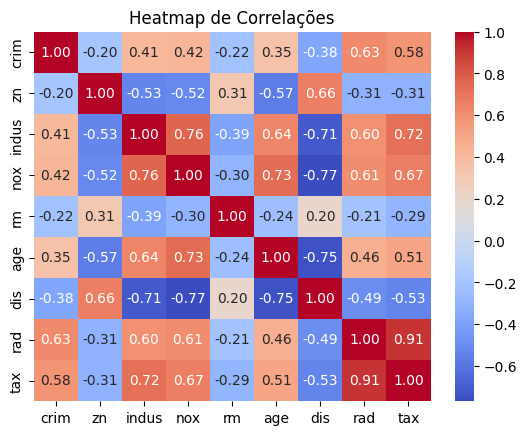

In [372]:
# 1. **Correlação entre variáveis**
list1 = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax"]
sns.heatmap(data[list1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap de Correlações")
plt.show()


## Diagrama de Caixa (chas vs nox)

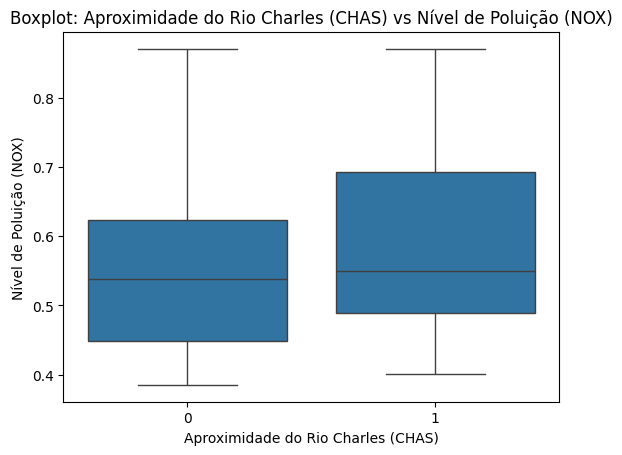

In [373]:
# 2. **Boxplot: Aproximidade do Rio Charles  (chas) vs. Classe Acessibilidade (nox)**
sns.boxplot(x="chas", y="nox", data=data)
plt.title("Boxplot: Aproximidade do Rio Charles (CHAS) vs Nível de Poluição (NOX)")
plt.xlabel("Aproximidade do Rio Charles (CHAS)")
plt.ylabel("Nível de Poluição (NOX)")
plt.show()

# Implementação

## Implementação Supervised

### Método Decision Tree

#### Model Assessment

In [374]:
x = data_cleaned.drop('chas', axis=1)
y = data_cleaned['chas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

dtree = DecisionTreeClassifier(random_state=1234)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

#### Visualização da árvore

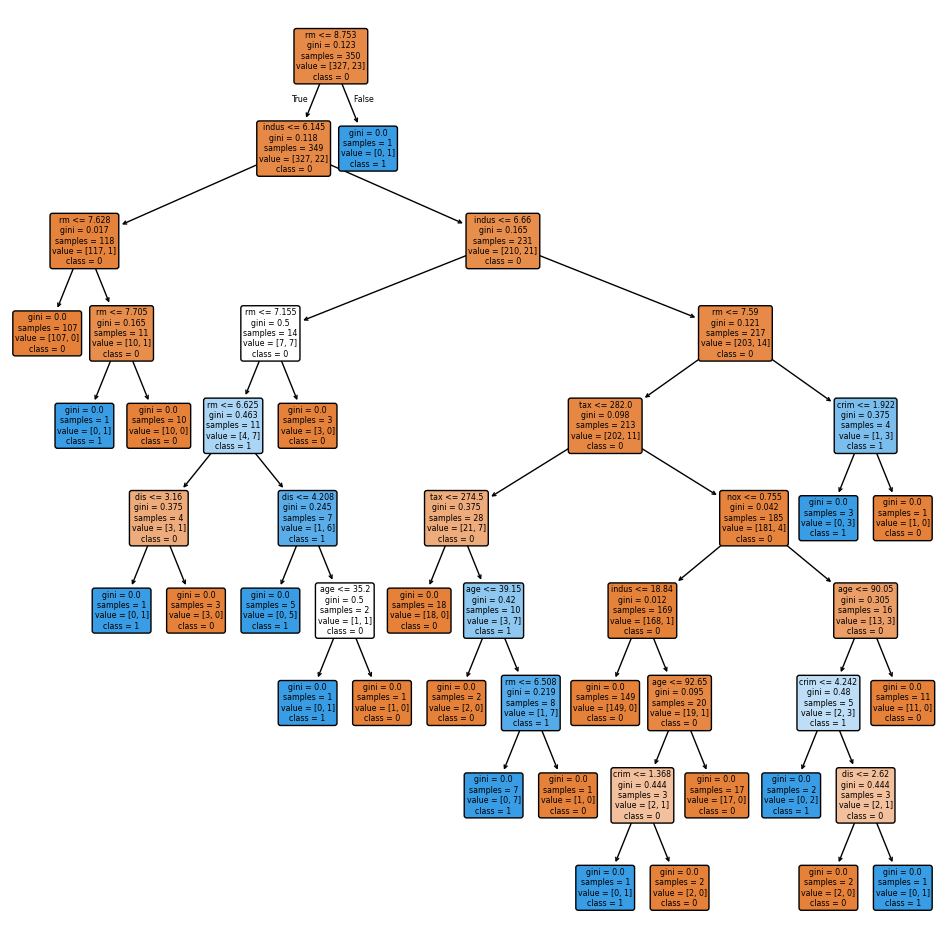

In [375]:
plt.figure(figsize=(12,12))
plot_tree(dtree,
                    feature_names=x.columns,
                    class_names=[str(cls) for cls in y.unique()],
                    filled=True, rounded=True)
plt.show()

#### Model Assessment

Accuracy: 0.9133333333333333
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       139
           1       0.33      0.18      0.24        11

    accuracy                           0.91       150
   macro avg       0.64      0.58      0.59       150
weighted avg       0.89      0.91      0.90       150



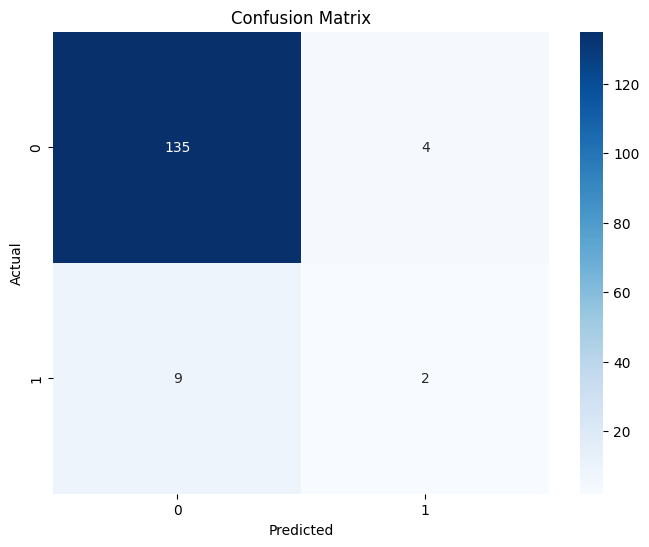

In [376]:
# Assess the model
y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix

cmatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cmatrix, annot= True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

O modelo obteve uma accuracy geral de 91.33%, indicando um bom desempenho. No entanto, a análise por classe revela diferenças significativas:

Classe 0 (Não perto do Rio Charles): Excelente desempenho com precision de 94%, recall de 97% e um F1-score de 95%, mostrando que o modelo identifica muito bem esta classe.

Classe 1 (Perto do Rio Charles): Desempenho limitado com precision de 33%, recall de 18% e um F1-score de 24%, evidenciando dificuldades em prever corretamente os imóveis desta classe minoritária.

#### Melhores parâmetros do modelo

In [377]:
param_grid = {
    'max_depth': range(2, 10),
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dtree, param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


Após ajustar o modelo com GridSearchCV, foram encontrados os melhores valores, sendo estes, {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}, o modelo otimizado obteve uma accuracy de 92.7%, indicando uma melhoria em relação ao modelo anterior.

### Método K-fold

#### Model instantiation

In [378]:
feature_names = data_cleaned.columns.drop('chas').tolist()
features = data_cleaned[feature_names]

target = data_cleaned['chas']
target_names = ['Near Charles', 'Not Near Charles']

print ('Features', feature_names, 'Classes', target_names)

classifier = DecisionTreeClassifier(random_state=27)

Features ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax'] Classes ['Near Charles', 'Not Near Charles']


#### Model Assessment

In [379]:
acc_score = cross_val_score(classifier, features, target, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )

f1_score = cross_val_score(classifier, features, target, cv=10, scoring='f1_macro')
print("CV Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

CV Mean Accuracy: 0.798 (+/- 0.105)
CV Mean F1: 0.492 (+/- 0.067)


#### Model deployment

In [380]:
final_classifier = classifier.fit(features, target)

x_new = data_cleaned.drop(columns=['chas']).iloc[0].to_numpy().reshape(1,-1)
prediction = final_classifier.predict(x_new)

print(classification_report(target, final_classifier.predict(features), digits=3))
print(confusion_matrix(target, final_classifier.predict(features)))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       466
           1      1.000     1.000     1.000        34

    accuracy                          1.000       500
   macro avg      1.000     1.000     1.000       500
weighted avg      1.000     1.000     1.000       500

[[466   0]
 [  0  34]]


C:\Users\Goncalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Durante o K-fold com 10 folds, o modelo teve uma accuracy média de 79.8%. Isso indica que o modelo previu 79.8% dos casos, com um desvio padrão de +/- 0.105(10.5%), o que é relativamente alto e isso pode indicar instabilidade no modelo.
Quanto ao F1-score, este foi consideravelmente mais baixo(49.2%), sugerindo que o modelo tem dificuldade em lidar com o equilibrio entre precisão e recall.

Quanto ao desempenho no Conjunto completo de dados, o modelo alcançou resultados perfeitos para ambas classes.

Quanto à Confusion Matrix, o modelo classificou corretamente 466 exemplos da classe 'Not Near Charles' e 34 exemplos da classe 'Near Charles'

#### Melhores Parâmetros do modelo

In [381]:
param_grid = {
    'max_depth': range(2, 20),
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(classifier, param_grid, cv= 10, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}


Após ajustar o modelo com GridSearchCV, foram encontrados os melhores valores, sendo estes, {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}, o modelo otimizado obteve uma accuracy de 92.7%, indicando uma melhoria em relação ao modelo anterior.

## Implementação Unsupervised- KMeans

### Elbow Method

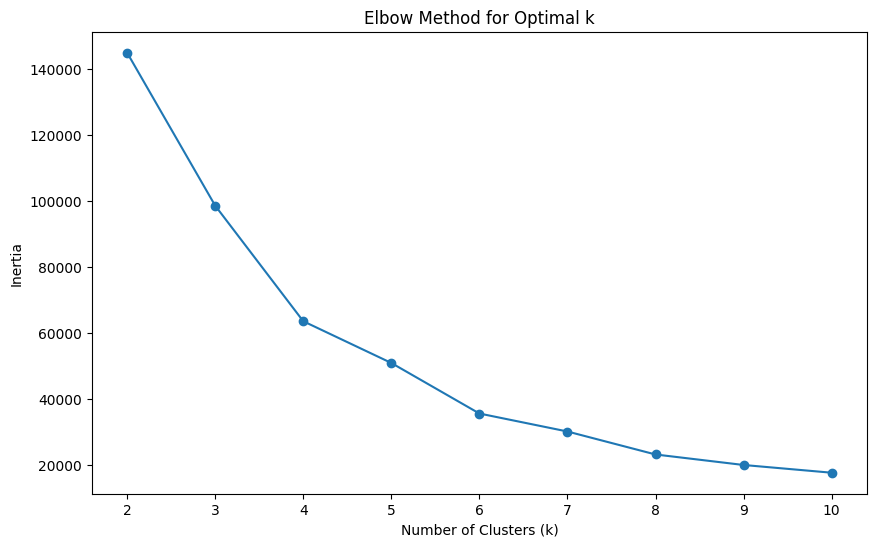

In [382]:
data_scaled = data_cleaned[['crim', 'rad', 'age']]

# Inicializar listas para resultados
inertia = []
silhouette_scores = []
k_values = range(2, 11)

# Testar valores de k de 2 a 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Gráfico do Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

O gráfico representa o Método do Cotovelo (Elbow Method) aplicado para determinar o número ideal de clusters em um problema de agrupamento ao utilizar o algoritmo K-Means. No eixo X está o número de clusters (k), o que varia de 2 a 10, enquanto no eixo Y está a inércia, que mede a soma das distâncias quadradas dentro dos clusters, indica o quão bem os dados estão agrupados. Observa-se que a inércia diminui à medida que o número de clusters aumenta, pois os pontos ficam mais próximos de seus centróides. O número ideal de clusters é identificado visualmente no gráfico.

### Silhouette Score

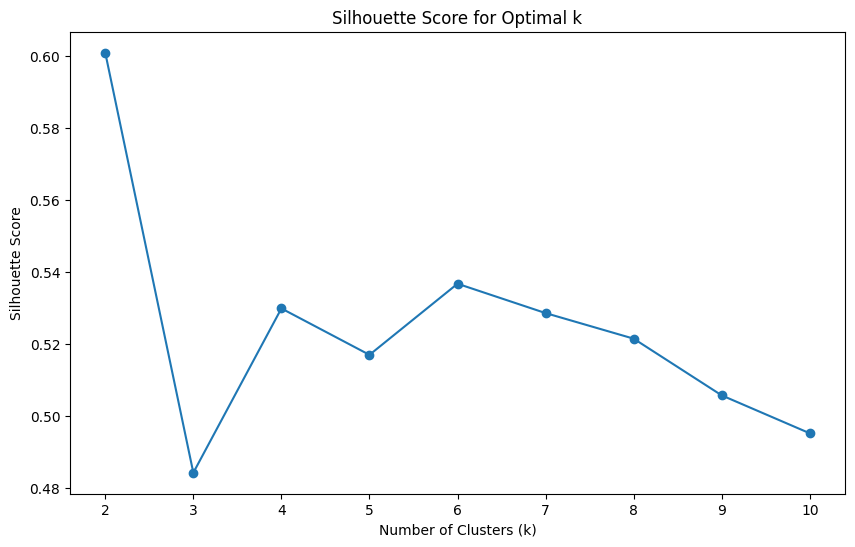

In [383]:
# Gráfico do Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

O gráfico mostra o Silhouette Score em função do número de clusters (k) para determinar a qualidade do agrupamento em um modelo K-Means. No eixo X está o número de clusters, varia de 2 a 10, e no eixo Y está o Silhouette Score, que avalia o quão bem os dados estão agrupados. Valores mais altos do Silhouette Score indicam que os clusters estão melhores definidos, com maior separação entre si e maior coesão interna.

### Atribuição de Clusters no Dataset

In [384]:
# Definir o número ótimo de clusters (baseado na análise anterior)
optimal_k = 2

# Aplicar K-Means ao dataset padronizado
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_cleaned)

# Adicionar a atribuição de clusters ao dataset original
data_cleaned['cluster'] = clusters

# Visualizar uma amostra do dataset com os clusters
data_cleaned.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,0


O código utiliza o algoritmo K-Means com k = 2, que foi definido como o número ideal de clusters com base na análise prévia do Silhouette Score. O modelo é treinado no dataset padronizado, e cada observação é atribuída a um dos dois clusters, o que gera labels (0 ou 1) que representam os grupos formados. Essas labels são adicionadas ao dataset original em uma nova coluna chamada cluster, o que permite relacionar cada observação com o cluster ao qual pertence.

A saída exibe as primeiras cinco linhas do dataset atualizado, onde todas as colunas originais são preservadas, e a nova coluna cluster indica o agrupamento de cada observação. Por exemplo, na amostra fornecida, todas as observações pertencem ao cluster 0, sugerindo que o outro cluster (1) agrupa dados diferentes que não aparecem nas primeiras linhas. Esse processo é essencial para segmentação e análise de padrões, com a possibilidade de explorar os clusters posteriormente por meio de visualizações e estatísticas descritivas para entender suas características principais.

### Distribuição dos clusters

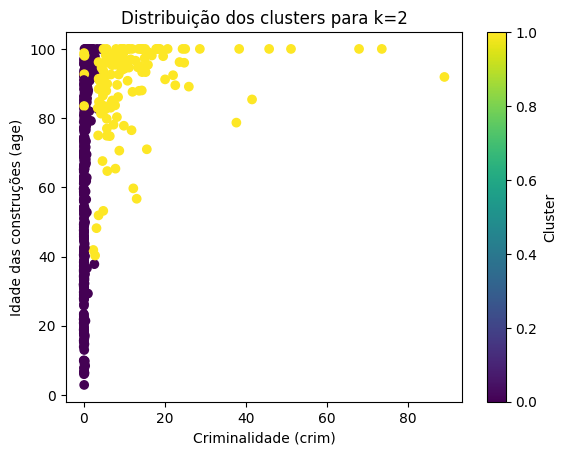

In [385]:
plt.scatter(data_cleaned['crim'], data_cleaned['age'], c=data_cleaned['cluster'], cmap='viridis')
plt.xlabel('Criminalidade (crim)')
plt.ylabel('Idade das construções (age)')
plt.title('Distribuição dos clusters para k=2')
plt.colorbar(label='Cluster')
plt.show()

O gráfico apresenta a distribuição dos clusters gerados pelo algoritmo K-Means com k = 2, o que usa as variáveis criminalidade (crim) no eixo X e idade das construções (age) no eixo Y. Cada ponto no gráfico representa uma observação do dataset, com as cores a indicar os clusters atribuídos (0 ou 1), conforme a escala de cores fornecida pela barra lateral.

Os clusters estão separados visualmente, Um cluster (em roxo) concentra pontos com valores baixos de criminalidade (crim). O outro cluster (em amarelo) agrupa observações com valores mais altos de criminalidade (crim), enquanto a idade das construções (age) varia em uma ampla faixa para ambos os clusters.

Esse gráfico ajuda a interpretar como o algoritmo K-Means separou os dados com base nesses dois atributos, é possivel visualizar que crim teve um impacto relevante na formação dos clusters.

### Matriz de confusão

In [386]:
features = ['crim', 'rad', 'age']
if all(feature in data_cleaned.columns for feature in features):
    data_features = data_cleaned[features]

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_features)

    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    data_cleaned['cluster'] = clusters

    median_crim = data_cleaned['crim'].median()
    data_cleaned['true_class'] = data_cleaned['crim'].apply(lambda x: 1 if x > median_crim else 0)

    print("\nMatriz de confusão:")
    print(metrics.confusion_matrix(data_cleaned['true_class'], clusters))
else:
    print("Nem todas as colunas necessárias estão presentes no dataset. Verifique se 'crim', 'rad' e 'age' existem.")



Matriz de confusão:
[[250   0]
 [118 132]]


A matriz de confusão mostra o desempenho do modelo de clustering em relação à classificação real com base no valor mediano de 'crim'. Ela indica que 250 amostras foram corretamente classificadas como 0 (classe abaixo da mediana de 'crim'), nenhuma amostra foi incorretamente atribuída à classe 1, e 132 amostras foram corretamente atribuídas à classe 1 (acima da mediana de 'crim'). No entanto, o modelo cometeu 118 falsos negativos, ou seja, classificou amostras da classe 1 como pertencentes à classe 0. Isso sugere que o modelo tem um bom desempenho, mas ainda apresenta alguns erros, especialmente no caso dos falsos negativos.

### Análise de clusters

In [387]:
def analyze_clusters(data, clusters):
    data['cluster'] = clusters

    cluster_class_counts = data.groupby(['cluster', 'true_class']).size().unstack(fill_value=0)
    
    cluster_stats = pd.DataFrame()
    cluster_stats['cluster'] = cluster_class_counts.index
    cluster_stats['total_samples'] = cluster_class_counts.sum(axis=1)

    for true_class in data['true_class'].unique():
        cluster_stats[f'class_{true_class}_count'] = cluster_class_counts.get(true_class, 0)

    for true_class in data['true_class'].unique():
        cluster_stats[f'class_{true_class}_proportion'] = cluster_class_counts.get(true_class, 0) / cluster_stats['total_samples']

    return cluster_stats

cluster_analysis = analyze_clusters(data_cleaned, clusters)

print(cluster_analysis)


   cluster  total_samples  class_0_count  class_1_count  class_0_proportion  \
0        0            368            250            118            0.679348   
1        1            132              0            132            0.000000   

   class_1_proportion  
0            0.320652  
1            1.000000  


O código realiza uma análise dos clusters gerados pelo algoritmo K-Means, o que conta a distribuição das ('true_class') dentro de cada cluster. Foi criado uma tabela onde são exibidos o número total de amostras em cada cluster, a quantidade de amostras pertencentes a cada classe e a proporção de cada classe dentro de cada cluster. O resultado mostra que no cluster 0, 68% das amostras pertencem à classe 0 e 32% à classe 1. Já no cluster 1, 100% das amostras pertencem à classe 1, com nenhuma amostra da classe 0. Isto ajuda a entender como as classes estão distribuídas entre os clusters.

### Médias das variaveis por cluster

In [388]:
# Agrupar os dados por cluster e calcular a média das colunas relevantes
cluster_averages = data_cleaned.groupby('cluster')[['crim', 'rad', 'age']].mean()

# Exibir os resultados
print("Médias das variáveis por cluster:")
print(cluster_averages)

Médias das variáveis por cluster:
              crim        rad        age
cluster                                 
0         0.388894   4.453804  60.994837
1        12.759291  24.000000  89.805303


O código agrupa os dados por cluster e calcula a média das colunas 'crim', 'rad' e 'age' para cada cluster. O resultado mostra que no cluster 0, as médias das variáveis são significativamente mais baixas: o valor médio de 'crim' é 0.39, 'rad' é 4.45 e 'age' é aproximadamente 61. Já no cluster 1, os valores são muito mais altos: 'crim' tem uma média de 12.76, 'rad' é 24 (o que indica uma diferença clara em relação ao cluster 0) e 'age' é 89.81. Isso sugere que os dois clusters representam grupos muito distintos em relação a essas variáveis.

### Agrupamento de dados com K-Means

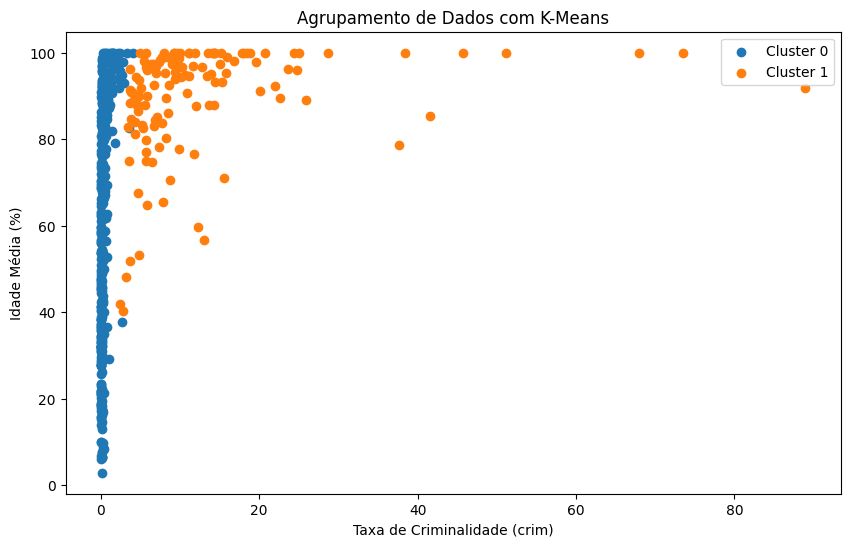

In [389]:
# Visualize cluster assignments
plt.figure(figsize=(10, 6))
unique_clusters = data_cleaned['cluster'].unique()

for cluster_id in unique_clusters:
    cluster_data = data_cleaned[data_cleaned['cluster'] == cluster_id]
    plt.scatter(cluster_data['crim'], cluster_data['age'], label=f'Cluster {cluster_id}')

plt.xlabel('Taxa de Criminalidade (crim)')
plt.ylabel('Idade Média (%)')
plt.title('Agrupamento de Dados com K-Means')
plt.legend()
plt.show()

O gráfico apresenta o agrupamento de dados o que utiliza o algoritmo K-Means. Cada ponto representa uma instância dos dados, dividida em dois grupos principais. O Cluster 0, em azul, é composto principalmente por regiões com baixa taxa de criminalidade. Por outro lado, o Cluster 1, em laranja, agrupa regiões com taxas de criminalidade mais altas, embora também inclua alguns casos em áreas de baixa criminalidade. No eixo X, está a taxa de criminalidade (crim), e no eixo Y, a idade média (%). O padrão identificado sugere uma separação clara entre as regiões de acordo com as variáveis analisadas.

## Implementação Unsupervised Apriori

In [390]:
print("Numero de Linhas", len(data_cleaned))

# Verificar valores unicos para as colunas importantes
print("Crim:", data_cleaned['crim'].nunique())
print("Nox:", data_cleaned['nox'].nunique())
print("Rad:", data_cleaned['rad'].nunique())

Numero de Linhas 500
Crim: 499
Nox: 81
Rad: 9


A coluna "crim" apresenta 499 valores únicos, o que indica que quase todos os registos têm um valor distinto. A coluna "nox" possui 81 valores únicos, o que mostra alguma repetição. Já a coluna "rad" tem apenas 9 valores únicos, o que sugere que seus dados são categóricos ou discretos.

### Pivot Table

In [397]:
ds_grouped = data_cleaned.groupby(['crim', 'nox', 'rad'])
data_cleaned['transaction'] = data_cleaned.index
ds_grouped.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,cluster,true_class,crim_alto,nox_alto,rad_alto,transaction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,0,0,0,0,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,0,0,0,0,0,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,0,0,0,0,0,3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,0,0,0,1,0,495
496,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,0,0,0,1,0,496
497,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,0,0,0,1,0,497
498,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,0,0,0,1,0,498


O código realiza um agrupamento dos dados do DataFrame data_cleaned com base nas colunas crim, nox e rad. Após o agrupamento, uma nova coluna chamada transaction é adicionada ao DataFrame, que contém o índice de cada linha como identificador único. Em seguida, o método head() é usado para exibir as primeiras linhas do DataFrame agrupado.

O DataFrame resultante mantém todas as colunas originais, além da nova coluna transaction, totalizando 16 colunas no total. Essa operação organiza os dados em grupos distintos, baseados nas combinações únicas das colunas crim, nox e rad. O agrupamento permite realizar análises mais específicas por grupo, sem alterar os dados originais.

In [398]:
ds_pivot = pd.pivot_table(data=data_cleaned, 
                          index='transaction', 
                          columns=['crim', 'nox', 'rad'],
                          aggfunc=lambda x: 1,
                          fill_value=0).applymap(lambda x: True if x > 0 else False)

print(ds_pivot.tail(5))

C:\Users\Goncalo\AppData\Local\Temp\ipykernel_25204\1630642385.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fill_value=0).applymap(lambda x: True if x > 0 else False)


                 age                                                        \
crim        0.00632  0.00906  0.01096  0.01301  0.01311  0.01360  0.01381    
nox            0.538    0.400    0.389    0.442    0.403    0.410    0.422   
rad               1        1        1        1        5        3        4    
transaction                                                                  
495            False    False    False    False    False    False    False   
496            False    False    False    False    False    False    False   
497            False    False    False    False    False    False    False   
498            False    False    False    False    False    False    False   
499            False    False    False    False    False    False    False   

                                        ...       zn                    \
crim        0.01432  0.01439  0.01501   ... 25.94060 28.65580 37.66190   
nox            0.411    0.401    0.435  ...    0.679    0.597    0.679 

O código cria uma tabela dinâmica (pivot table) a partir do DataFrame data_cleaned, utiliza a coluna "transaction" como índice, o que representa identificadores únicos para cada transação ou registo. As colunas da tabela dinâmica são formadas pelas combinações de "crim", "nox" e "rad". A função de agregação (aggfunc) preenche as células com o valor 1 quando há um dado correspondente, ou 0 caso contrário. Posteriormente, os valores são convertidos para True (quando maior que 0) ou False (quando igual a 0). O resultado é uma matriz binária com 6000 colunas, correspondentes às combinações únicas de "crim", "nox" e "rad". As últimas 5 linhas dessa matriz mostram que todas as combinações específicas para essas transações resultaram em False, o que indica que nenhuma dessas combinações ocorreu para as últimas linhas do índice "transaction". 

### Learning Rules

In [391]:
median_crim = data_cleaned['crim'].median()
median_nox = data_cleaned['nox'].median()
median_rad = data_cleaned['rad'].median()

data_cleaned['crim_alto'] = (data_cleaned['crim'] > median_crim).astype(int)
data_cleaned['nox_alto'] = (data_cleaned['nox'] > median_nox).astype(int)
data_cleaned['rad_alto'] = (data_cleaned['rad'] > median_rad).astype(int)

In [392]:
df_apriori = data_cleaned[['crim_alto', 'nox_alto', 'rad_alto']]

In [400]:
min_support = 0.01
frequent_itemsets = apriori(df_apriori, min_support=min_support, use_colnames=True)
num_itemsets = len(frequent_itemsets)

if frequent_itemsets.empty:
    print("Nenhum itemset frequente encontrado com o suporte mínimo atual.")
else:
    min_confidence = 0.5 
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=num_itemsets)

    rules_sorted = rules.sort_values('confidence', ascending=False)
    print(rules_sorted.head(10))

    print("\nAnálise das Regras:")
    for index, row in rules_sorted.head(10).iterrows():
        antecedents = ", ".join(list(row['antecedents']))
        consequents = ", ".join(list(row['consequents']))
        confidence = row['confidence']
        lift = row['lift']
        print(f"SE {antecedents} ENTÃO {consequents} (Confiança: {confidence:.2f}, Lift: {lift:.2f})")

             antecedents            consequents  antecedent support  \
6   (rad_alto, nox_alto)            (crim_alto)               0.288   
7  (rad_alto, crim_alto)             (nox_alto)               0.310   
0             (nox_alto)            (crim_alto)               0.466   
2             (rad_alto)            (crim_alto)               0.396   
1            (crim_alto)             (nox_alto)               0.500   
4             (rad_alto)             (nox_alto)               0.396   
8  (nox_alto, crim_alto)             (rad_alto)               0.388   
9             (rad_alto)  (nox_alto, crim_alto)               0.396   
3            (crim_alto)             (rad_alto)               0.500   
5             (nox_alto)             (rad_alto)               0.466   

   consequent support  support  confidence      lift  representativity  \
6               0.500    0.260    0.902778  1.805556               1.0   
7               0.466    0.260    0.838710  1.799806               1.0

C:\Users\Goncalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


O código realiza uma análise de associação o que utiliza o algoritmo Apriori em um conjunto de dados denominado data_cleaned. Primeiramente, calcula a mediana das colunas crim, nox e rad, e cria novas colunas binárias (crim_alto, nox_alto, rad_alto) para indicar se os valores dessas variáveis são superiores à mediana correspondente. Em seguida, é gerado um conjunto de itemsets frequentes a partir dessas novas variáveis binárias, o que usa um suporte mínimo de 1% (0.01). Caso itemsets frequentes sejam encontrados, são extraídas regras de associação com um nível mínimo de confiança de 50% (0.5), e as regras são ordenadas pela confiança.

As regras são apresentadas, com a descrição das combinações de variáveis (antecedentes e consequentes) que ocorrem juntas, junto com métricas como confiança e lift. As regras mais fortes sugerem que, por exemplo, quando nox_alto e crim_alto ocorrem, há uma alta probabilidade de rad_alto também ocorrer, com uma confiança de 67% e lift de 1.69. Essas regras ajudam a identificar padrões e relações significativas entre as variáveis.

### Análise de Regras de Associação

In [394]:
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6,"(rad_alto, nox_alto)",(crim_alto),0.288,0.500,0.260,0.902778,1.805556,1.0,0.116000,5.142857,0.626621,0.492424,0.805556,0.711389
7,"(rad_alto, crim_alto)",(nox_alto),0.310,0.466,0.260,0.838710,1.799806,1.0,0.115540,3.310800,0.644036,0.503876,0.697958,0.698325
0,(nox_alto),(crim_alto),0.466,0.500,0.388,0.832618,1.665236,1.0,0.155000,2.987179,0.748098,0.671280,0.665236,0.804309
2,(rad_alto),(crim_alto),0.396,0.500,0.310,0.782828,1.565657,1.0,0.112000,2.302326,0.598163,0.529010,0.565657,0.701414
1,(crim_alto),(nox_alto),0.500,0.466,0.388,0.776000,1.665236,1.0,0.155000,2.383929,0.798969,0.671280,0.580524,0.804309
4,(rad_alto),(nox_alto),0.396,0.466,0.288,0.727273,1.560671,1.0,0.103464,1.958000,0.594785,0.501742,0.489275,0.672649
8,"(nox_alto, crim_alto)",(rad_alto),0.388,0.396,0.260,0.670103,1.692180,1.0,0.106352,1.830875,0.668376,0.496183,0.453813,0.663334
9,(rad_alto),"(nox_alto, crim_alto)",0.396,0.388,0.260,0.656566,1.692180,1.0,0.106352,1.782000,0.677229,0.496183,0.438833,0.663334
3,(crim_alto),(rad_alto),0.500,0.396,0.310,0.620000,1.565657,1.0,0.112000,1.589474,0.722581,0.529010,0.370861,0.701414
5,(nox_alto),(rad_alto),0.466,0.396,0.288,0.618026,1.560671,1.0,0.103464,1.581258,0.672753,0.501742,0.367592,0.672649


As regras de associação mostram as relações mais fortes entre as variáveis binárias crim_alto, nox_alto e rad_alto. A primeira regra indica que, quando rad_alto e nox_alto ocorrem, há uma probabilidade de 90% de crim_alto também ocorrer. As métricas como confidence (probabilidade de ocorrência) e lift (força da associação) são usadas para avaliar a relevância das regras, o que destaca as combinações mais significativas entre as variáveis.

In [395]:
products_list = data_cleaned[['crim', 'nox','rad']].drop_duplicates()
products_list.head(10)

,crim,nox,rad
0,0.00632,0.538,1
1,0.02731,0.469,2
2,0.02729,0.469,2
3,0.03237,0.458,3
4,0.06905,0.458,3
5,0.02985,0.458,3
6,0.08829,0.524,5
7,0.14455,0.524,5
8,0.21124,0.524,5
9,0.17004,0.524,5


O código cria uma lista de produtos, seleciona as colunas crim, nox e rad do DataFrame data_cleaned e remove duplicadas. A partir disso, são mostradas as primeiras combinações dessas variáveis. Cada linha representa uma combinação distinta dos valores para crim, nox e rad, que correspondem a diferentes características ou registos no conjunto de dados. As colunas representam variáveis (crim),  (nox) e (rad).